<a href="https://colab.research.google.com/github/savitra-roy/Porfolio/blob/ML-projects/waam_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

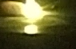

-1

In [ ]:
img= cv.imread('exp1.png')
cv2_imshow(img)
cv.waitKey(0)

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


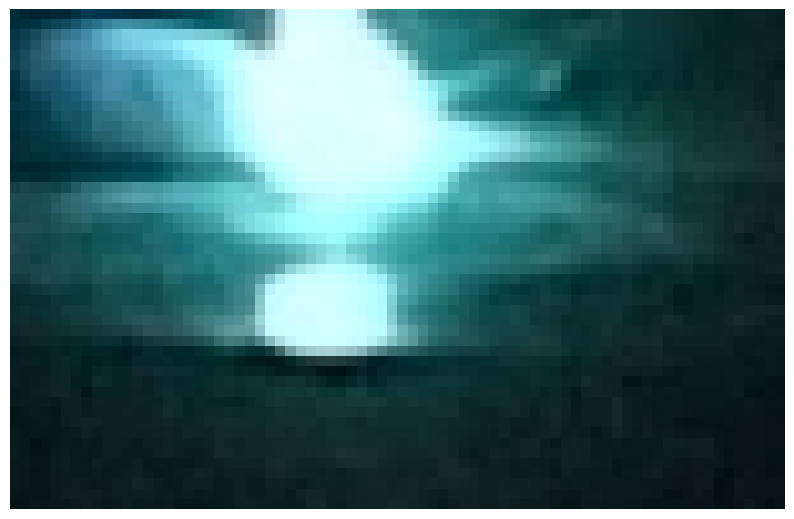

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.axis("off")
plt.show()

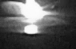

-1

In [41]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv.waitKey(0)


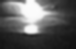

-1

In [42]:
blurred= cv.GaussianBlur(gray, (5,5), 0)
cv2_imshow(blurred)
cv.waitKey(0)

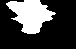

-1

In [43]:
_,threshold = cv.threshold(blurred, 127, 255, cv.THRESH_BINARY)
cv2_imshow(threshold)
cv.waitKey(0)

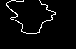

-1

In [44]:
cany =cv.Canny(threshold, 100, 200)
cv2_imshow(cany)
cv.waitKey(0)

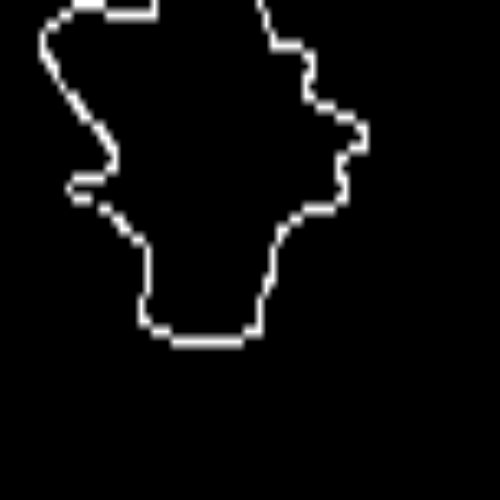

-1

In [45]:
resize= cv.resize(cany,(500,500))
cv2_imshow(resize)
cv.waitKey(0)

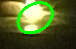

-1

In [46]:
contours,_= cv.findContours(cany,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
ellipse= None
for contour in contours:
  if len(contour)>=5:
    ellipse= cv.fitEllipse(contour)
    break
result_image= img.copy()
cv.ellipse(result_image, ellipse, (0,255,0), 2)
cv2_imshow(result_image)
cv.waitKey(0)

In [47]:
if ellipse:
    print("Fitted Ellipse Parameters:")
    print(f"Center: {ellipse[0]} pixels")
    print(f"Axes (Major, Minor): {ellipse[1]} pixels")
    print(f"Orientation: {ellipse[2]} degrees")
else:
    print("No ellipse could be fitted.")

Fitted Ellipse Parameters:
Center: (34.631263732910156, 17.292110443115234)
Axes (Major, Minor): (26.627864837646484, 37.03923034667969)
Orientation: 56.99094009399414 degrees


array([[[ 1, 45, 55],
        [ 0, 38, 49],
        [ 0, 34, 46],
        ...,
        [12, 37, 40],
        [ 9, 33, 36],
        [ 8, 31, 33]],

       [[ 0, 43, 56],
        [ 0, 46, 59],
        [ 1, 50, 65],
        ...,
        [ 9, 35, 38],
        [ 8, 32, 35],
        [ 7, 30, 32]],

       [[ 8, 53, 68],
        [14, 61, 77],
        [22, 73, 90],
        ...,
        [ 8, 33, 36],
        [ 9, 33, 36],
        [ 9, 32, 34]],

       ...,

       [[10, 26, 26],
        [ 8, 24, 24],
        [ 5, 22, 21],
        ...,
        [ 8, 20, 24],
        [ 9, 20, 23],
        [11, 21, 24]],

       [[ 7, 23, 23],
        [ 6, 22, 21],
        [ 6, 22, 21],
        ...,
        [ 9, 20, 24],
        [ 9, 19, 22],
        [ 9, 19, 22]],

       [[ 6, 20, 20],
        [ 6, 20, 20],
        [ 9, 23, 23],
        ...,
        [10, 20, 23],
        [ 4, 14, 17],
        [ 9, 19, 21]]], dtype=uint8)
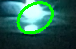

In [48]:
result_image

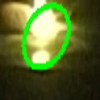

-1

In [51]:
resized_image= cv.resize(result_image,(100,100))
cv2_imshow(resized_image)
cv.waitKey(0)
